In [194]:
from neural_priors.utils.data import Subject
import pandas as pd
import os.path as op
import seaborn as sns
import numpy as np

In [200]:
subject_id = '17'
bids_folder = '/data/ds-neuralpriors'

In [201]:
df = pd.read_csv(op.join(bids_folder, 'derivatives', 'encoding_model', 'npcr_parameters.bak.tsv'), sep='\t',
                index_col=[0, 1, 2, 3, 4, 5,],
                dtype={'subject':str})
df.columns.name = 'parameter'
df.index.set_names('voxel', level=-1, inplace=True)

In [202]:
prf_pars0 = df.loc[(subject_id, 'wide', slice(None), 'smoothed', 'gaussian')].loc['both']

In [203]:
sub = Subject(subject_id, bids_folder)


prf_pars1 = sub.get_prf_parameters_volume(session=None, roi='NPCr', smoothed=True, cross_validated=False, gaussian=True, range_n='wide').rename(columns={'sd': 'width', 'mu':'mode'})

# prf_pars0 = sub.get_prf_parameters_volume(session=None, roi='NPCr', smoothed=True, cross_validated=False)

# prf_pars1['width'] = prf_pars1['sd']

In [204]:
prf_pars2 = sub.get_prf_parameters_volume(session=None, roi='NPCr', fixed_baseline=True, smoothed=True, cross_validated=False, gaussian=True, range_n='wide').rename(columns={'sd': 'width', 'mu':'mode'})

Could not load /data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.gaussian.smoothed.fixed_baseline.range_wide/sub-17/func/sub-17_desc-cvr2.optim_space-T1w_pars.nii.gz: File not found: '/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.gaussian.smoothed.fixed_baseline.range_wide/sub-17/func/sub-17_desc-cvr2.optim_space-T1w_pars.nii.gz'


/Users/gdehol/git/neural_priors/neural_priors/utils/data.py:366: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  parameters =  pd.concat(parameters, axis=1, keys=keys, names=['parameter']).astype(np.float32)


In [205]:
prf_pars = pd.concat((prf_pars0, prf_pars1, prf_pars2), axis=0, keys=['old', 'new', 'new (fixed baseline)'], names=['fitting'])

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


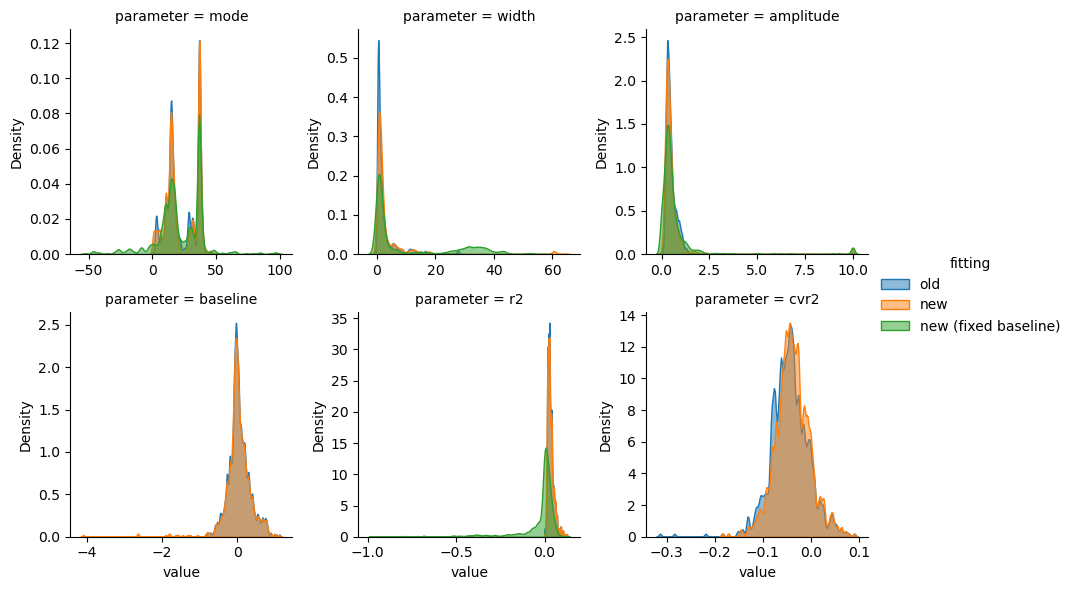

In [206]:
prf_pars['amplitude'] = np.clip(prf_pars['amplitude'], 0, 10)
tmp = prf_pars.stack().to_frame('value')

g = sns.FacetGrid(tmp.reset_index(), hue='fitting', col='parameter', col_wrap=3, sharey=False, sharex=False)

g.map(sns.kdeplot, 'value', fill=True, alpha=0.5, bw_adjust=.25)

g.add_legend()

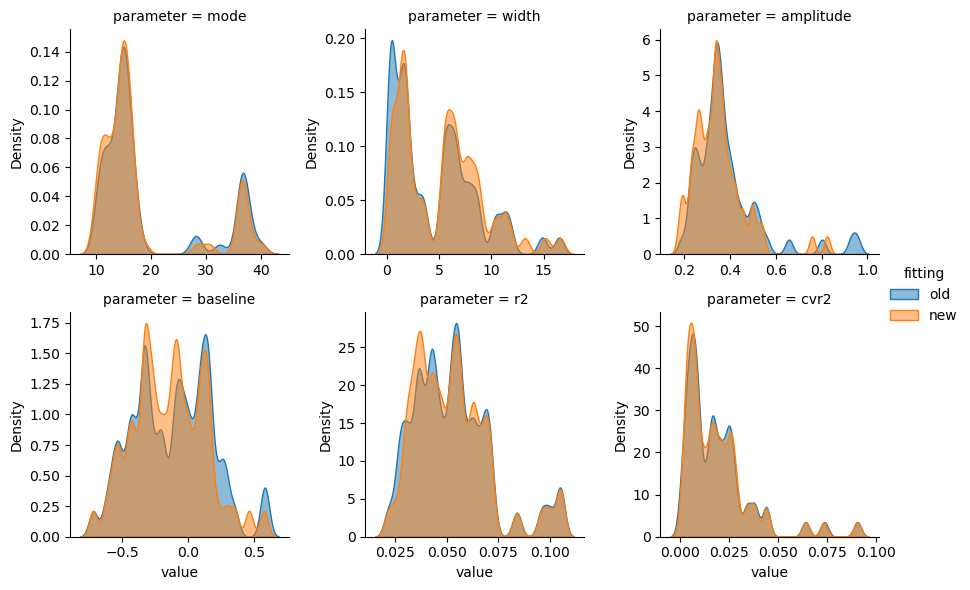

In [207]:
mask = prf_pars['cvr2'] > 0.0
mask &= prf_pars['mode'] > 10.0

tmp = prf_pars[mask].stack().to_frame('value')


g = sns.FacetGrid(tmp.reset_index(), hue='fitting', col='parameter', col_wrap=3, sharey=False, sharex=False)

g.map(sns.kdeplot, 'value', fill=True, alpha=0.5, bw_adjust=.25)

g.add_legend()

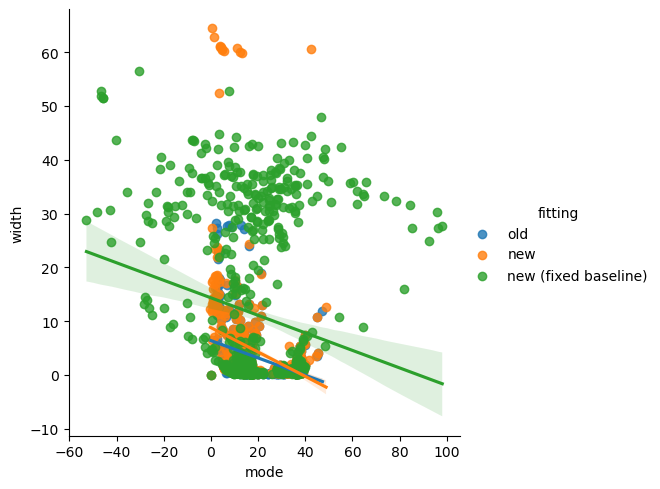

In [208]:
g = sns.FacetGrid(prf_pars.reset_index(), hue='fitting', height=5.)

g.map(sns.regplot, 'mode', 'width')

g.add_legend()